
# COVID-Team-1
### Dr. Mohanty
### Christopher Brantley
### CSC 405 01
### Last Updated: 10/18/2020
### I, Christopher Brantley, have abided by the UNCG academic policy.

In [1]:
import os 
os.chdir("../")

In [2]:
import ipynb
from ipynb.fs.full import covid_data as cd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Telling pandas not convert to html tags.
pd.set_option('display.html.table_schema', True)
# Max columns and rows to display.
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 8)

### Data Paths

In [4]:
# Relative to "../"
_state_daily_cases = "./chris/DATA/state_county_daily_cases.csv"
_state_daily_deaths = "./chris/DATA/state_county_daily_deaths.csv"

_state_weekly_casees = "./chris/DATA/state_county_weekly_cases.csv"
_state_weekly_deaths = "./chris/DATA/state_county_weekly_deaths.csv"

_state_county_weekly_stats_cases = "./chris/DATA/state_county_weekly_stats_cases.csv"
_state_county_weekly_stats_deaths = "./chris/DATA/state_county_weekly_stats_deaths.csv"

# Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific state.


### Generating daily new cases for State by county.

In [5]:
def state_daily_cases_to_csv(_state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_cases = df_primary_data[df_primary_data.State == _state].filter(regex = "County|cases")
    df_state_cases.set_index("County Name", inplace = True)
    df_daily_cases = pd.DataFrame(index = [df_state_cases.index])

    number_days = len(df_state_cases.filter(regex = "cases").columns)
    for day in range(-1, -number_days, -1):
        column_name = df_state_cases.columns[day]
        column_value = df_state_cases.iloc[:, day].sub(df_state_cases.iloc[:, day - 1]).values
        df_daily_cases.insert(0, column_name, column_value)

    first_column_name = df_state_cases.columns[0]
    first_column_values = df_state_cases.iloc[:, 0:1].values
    df_daily_cases.insert(0, first_column_name, first_column_values)
    df_daily_cases.to_csv(_state_daily_cases)

### Generating daily new deaths for State by county.

In [6]:
def state_daily_deaths_to_csv(state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_deaths = df_primary_data[df_primary_data.State == state].filter(regex = "County|deaths")
    df_state_deaths.set_index("County Name", inplace = True)
    df_daily_deaths = pd.DataFrame(index = [df_state_deaths.index])

    number_days = len(df_state_deaths.filter(regex = "deaths").columns)
    for day in range(-1, - number_days, -1):
        column_name = df_state_deaths.columns[day]
        column_values = df_state_deaths.iloc[:, day].sub(df_state_deaths.iloc[:, day - 1]).values
        df_daily_deaths.insert(0, column_name, column_values)

    first_column_name = df_state_deaths.columns[0]
    first_column_values = df_state_deaths.iloc[:, 0:1].values
    df_daily_deaths.insert(0, first_column_name, first_column_values)
    df_daily_deaths.to_csv(_state_daily_deaths)

### Accessor methods for State Daily Cases and Deaths.

In [7]:
# Accessor method for state daily cases by county.
def get_state_daily_cases(_state):
    """Returns dataframe containing state daily cases by county."""
    state_daily_cases_to_csv(_state)
    return pd.read_csv(_state_daily_cases, index_col=[0])
    
# Accessor method for state daily deaths by county.
def get_state_daily_deaths(_state):
    """Returns dataframe containing state daily deaths by county."""
    state_daily_deaths_to_csv(_state)
    return pd.read_csv(_state_daily_deaths, index_col=[0])

### Accessor/Generator for Normalized Daily Cases

In [8]:
def state_daily_cases_normalized(_state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_cases = df_primary_data[df_primary_data.State == _state].filter(regex = "County|cases")
    df_state_cases.set_index("County Name", inplace = True)
    df_daily_cases = pd.DataFrame(index = [df_state_cases.index])
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)
    
    number_days = len(df_state_cases.filter(regex = "cases").columns)
    for day in range(-1, -number_days, -1):
        column_name = df_state_cases.columns[day]
        column_value = df_state_cases.iloc[:, day].sub(df_state_cases.iloc[:, day - 1]).values
        df_daily_cases.insert(0, column_name, column_value)

    for county in df_state_cases.index.values:
        pop = df_state_pop.loc[county,"population"]
        df_daily_cases.loc[county, :] = \
        df_daily_cases.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values

    first_column_name = df_state_cases.columns[0]
    first_column_values = df_state_cases.iloc[:, 0:1].apply(lambda x: round(((x / pop) * 100000), 0)).values
    df_daily_cases.insert(0, first_column_name, first_column_values)
    
    return df_daily_cases

In [9]:
def state_daily_cases_log10(_state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_cases = df_primary_data[df_primary_data.State == _state].filter(regex = "County|cases")
    df_state_cases.set_index("County Name", inplace = True)
    df_daily_cases = pd.DataFrame(index = [df_state_cases.index])
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)
    
    number_days = len(df_state_cases.filter(regex = "cases").columns)
    for day in range(-1, -number_days, -1):
        column_name = df_state_cases.columns[day]
        column_value = df_state_cases.iloc[:, day].sub(df_state_cases.iloc[:, day - 1]).values
        df_daily_cases.insert(0, column_name, column_value)

    for county in df_state_cases.index.values:
        pop = df_state_pop.loc[county,"population"]
        df_daily_cases.loc[county, :] = \
        np.log10(df_daily_cases.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values)

    first_column_name = df_state_cases.columns[0]
    first_column_values = np.log10(df_state_cases.iloc[:, 0:1]\
                                   .apply(lambda x: round(((x / pop) * 100000), 0)).values)
    df_daily_cases.insert(0, first_column_name, first_column_values)
    
    return df_daily_cases

### Accessor/Generator for Normalized Daily Deaths

In [10]:
def state_daily_deaths_normalized(_state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_deaths = df_primary_data[df_primary_data.State == _state].filter(regex = "County|deaths")
    df_state_deaths.set_index("County Name", inplace = True)
    df_daily_deaths = pd.DataFrame(index = [df_state_deaths.index])
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)

    number_days = len(df_state_deaths.filter(regex = "deaths").columns)
    for day in range(-1, - number_days, -1):
        column_name = df_state_deaths.columns[day]
        column_values = df_state_deaths.iloc[:, day].sub(df_state_deaths.iloc[:, day - 1]).values
        df_daily_deaths.insert(0, column_name, column_values)

    for county in df_daily_deaths.index.values:
        pop = df_state_pop.loc[county,"population"]
        df_daily_deaths.loc[county, :] = \
        df_daily_deaths.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values
    
    first_column_name = df_state_deaths.columns[0]
    first_column_values = df_state_deaths.iloc[:, 0:1].apply(lambda x:(x / pop) * 100000).values
    df_daily_deaths.insert(0, first_column_name, first_column_values)
    return df_daily_deaths

In [11]:
def state_daily_deaths_log10(_state):
    df_primary_data = cd.get_covid_primary_data()
    df_state_deaths = df_primary_data[df_primary_data.State == _state].filter(regex = "County|deaths")
    df_state_deaths.set_index("County Name", inplace = True)
    df_daily_deaths = pd.DataFrame(index = [df_state_deaths.index])
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)

    number_days = len(df_state_deaths.filter(regex = "deaths").columns)
    for day in range(-1, - number_days, -1):
        column_name = df_state_deaths.columns[day]
        column_values = df_state_deaths.iloc[:, day].sub(df_state_deaths.iloc[:, day - 1]).values
        df_daily_deaths.insert(0, column_name, column_values)

    for county in df_daily_deaths.index.values:
        pop = df_state_pop.loc[county,"population"]
        df_daily_deaths.loc[county, :] = \
        np.log10(df_daily_deaths.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values)
    
    first_column_name = df_state_deaths.columns[0]
    first_column_values = np.log10(df_state_deaths.iloc[:, 0:1].apply(lambda x:(x / pop) * 100000).values)
    df_daily_deaths.insert(0, first_column_name, first_column_values)
    return df_daily_deaths

### Generating Weekly Cases for State by County.

In [12]:
def state_weekly_cases_to_csv(state):
    df_county_cases = get_state_daily_cases(state)
    number_days = df_county_cases.filter(regex = "cases").shape[1]
    number_weeks = int(((7 - number_days % 7) + number_days) / 7)

    index_county = []
    index_weeks = []
    for county in df_county_cases.index.values:
        for week in range(0, number_weeks, 1):
            index_county.append(county)
            index_weeks.append("week " + str(week + 1))
    
    df_county_weekly = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
    for county in df_county_cases.index.values:
        for column in range(0, df_county_cases.shape[1], 7):
            df_county_weekly.loc[(county, "week " + str((column // 7) + 1))] = \
                df_county_cases.loc[county].iloc[column:column + 7].sum()
    df_county_weekly.to_csv(_state_weekly_casees)

### Generating Weekly Deaths for State by County.

In [13]:
def state_weekly_deaths_to_csv(state):
    df_county_deaths = get_state_daily_deaths(state)
    number_days = df_county_deaths.filter(regex = "deaths").shape[1]
    number_weeks = int(((7 - number_days % 7) + number_days) / 7)
    
    index_county = []
    index_weeks = []
    for county in df_county_deaths.index.values:
        for week in range(0, number_weeks, 1):
            index_county.append(county)
            index_weeks.append("week " + str(week + 1))
            
    df_county_weekly = pd.DataFrame(index = [index_county, index_weeks],
                                    columns = ["deaths"])
    for county in df_county_deaths.index.values:
        for column in range(0, df_county_deaths.shape[1], 7):
            df_county_weekly.loc[(county, "week " + str((column // 7) + 1))] = \
                df_county_deaths.loc[county].iloc[column:column + 7].sum()
    df_county_weekly.to_csv(_state_weekly_deaths)

### Accessor Methods for State Weekly Cases and Deaths

In [14]:
# Accessor method for state weekly cases by county.
def get_state_weekly_cases(_state):
    state_weekly_cases_to_csv(_state)
    return pd.read_csv(_state_weekly_casees, index_col=[0, 1])
    
# Accessor method for state weekly deaths by county.
def get_state_weekly_deaths(_state):
    """Returns dataframe containing state weekly deaths by county."""
    state_weekly_deaths_to_csv(_state)
    return pd.read_csv(_state_weekly_deaths, index_col=[0, 1])

### Generating Weekly Case Stats for State by county.

In [15]:
def state_weekly_cases_stats_to_csv(_state,):
    df_primary_data = cd.get_covid_primary_data()
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)
    df_weekly_normalized = get_state_weekly_cases(_state)

    # Normalizing cases to 100,000.
    for county in df_weekly_normalized.index.get_level_values(0).unique():
        pop = df_state_pop.loc[county, "population"]
        df_weekly_normalized.loc[county, :] = \
        df_weekly_normalized.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values

    df_county_normalized = pd.DataFrame(index = [df_weekly_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
    for county in df_weekly_normalized.index.get_level_values(0).unique():
        df_county_normalized.loc[county, "mean"] = df_weekly_normalized.loc[county].mean()[0]
        df_county_normalized.loc[county, "median"] = df_weekly_normalized.loc[county].median()[0]
        df_county_normalized.loc[county, "mode"] = df_weekly_normalized.loc[county].mode().values[0,0]
    df_county_normalized.to_csv(_state_county_weekly_stats_cases)

### Generating Weekly Deaths Stats for State by county.

In [16]:
def state_weekly_deaths_stats_to_csv(_state,):
    df_primary_data = cd.get_covid_primary_data()
    df_state_pop = df_primary_data[df_primary_data.State == _state].filter(regex = "County|population")
    df_state_pop.set_index("County Name", inplace = True)
    df_weekly_normalized = get_state_weekly_deaths(_state)

    # Normalizing cases to 100,000.
    for county in df_weekly_normalized.index.get_level_values(0).unique():
        pop = df_state_pop.loc[county, "population"]
        df_weekly_normalized.loc[county, :] = \
        df_weekly_normalized.loc[county, :].apply(lambda x: round(((x / pop) * 100000), 0)).values

    df_county_normalized = pd.DataFrame(index = [df_weekly_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
    for county in df_weekly_normalized.index.get_level_values(0).unique():
        df_county_normalized.loc[county, "mean"] = round(df_weekly_normalized.loc[county].mean()[0], 0)
        df_county_normalized.loc[county, "median"] = round(df_weekly_normalized.loc[county].median()[0])
        df_county_normalized.loc[county, "mode"] = round(df_weekly_normalized.loc[county].mode().values[0,0], 0)
    df_county_normalized.to_csv(_state_county_weekly_stats_deaths)

### Accessor Methods for State Weekly Cases and Deaths

In [17]:
# Accessor method for state weekly cases by county.
def get_county_weekly_cases_stats(_state):
    state_weekly_cases_stats_to_csv(_state)
    return pd.read_csv(_state_county_weekly_stats_cases, index_col=[0])
    
# Accessor method for state weekly deaths by county.
def get_county_weekly_deaths_stats(_state):
    """Returns dataframe containing state weekly deaths by county."""
    state_weekly_deaths_stats_to_csv(_state)
    return pd.read_csv(_state_county_weekly_stats_deaths, index_col=[0])

### Generator and Accessor for  Weekly Cases Stats for State.

In [18]:
def county_weekly_stats_overall(_state):
    df_overall_weekly_county = pd.DataFrame(index = [_state + " weekly cases",
                                 _state + " weekly deaths"],
                 columns = ["mean", "median", "mode"])

    for data_type, dataset in zip(tuple(df_overall_weekly_county.index.values),\
                                  (get_county_weekly_cases_stats(_state),\
                                   get_county_weekly_deaths_stats(_state))):
        df_overall_weekly_county.loc[data_type, "mean"] = dataset["mean"].mean()
        df_overall_weekly_county.loc[data_type, "median"] = dataset["median"].median()
        df_overall_weekly_county.loc[data_type, "mode"] = dataset["mode"].mode()[0]

    return df_overall_weekly_county

# Fit a distribution to the number of COVID-19 cases of a state. 

### Graphically plot the distribution and describe the distribution statistics.

In [24]:
df_daily_county = get_state_daily_cases("FL")
df_daily_state = df_daily_county.sum()

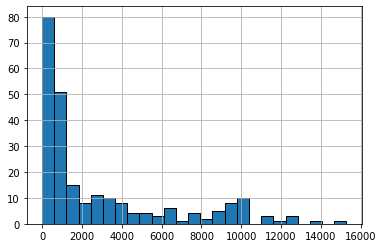

In [30]:
graph = df_daily_state.hist(bins = 25, ec = "black")

In [26]:
df_daily_state.skew()

1.4194890970262892

#### The calculated skew is positive which implies a right skewed graph.

In [27]:
df_daily_state.mean()

2801.8200836820083

#### We see that our mean is pulled ito the right, but not by much.

In [28]:
df_daily_state.kurtosis()

0.9205771282583206

#### Kurtosis greater than 0 implies heavily skewed data.

### Describe why the distribution was chosen and its statistics in the report and the notebook. 

#### We are going to chose geometric distribution to model the data. This is because geometric distribution is used for discrete data, it can be used to measure success/failure, where success can be described as not having any case.

# Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, Number of new cases and deaths per 100,000 populations. (normalize by population, you can choose a different normalization factor that 100,000)

In [43]:
random_states = [x for x in np.random.choice(cd.get_covid_primary_data().State.unique(), 6)]
random_states = ['OH', 'KS', 'NE', 'AR', 'ID', 'ND']
display(random_states[0:3])

['OH', 'KS', 'NE']

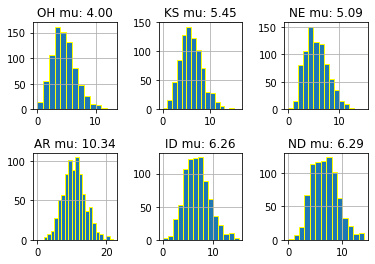

In [48]:
fig, axis = plt.subplots(2,3, gridspec_kw={'hspace': .5, 'wspace': .5})
for x, states in zip((0,1), (random_states[0:3], random_states[3:])):
    for y, state in zip((0,1,2), states):
        mu_cases = state_daily_cases_normalized(state).mean().mean()
        d_poisson = stats.poisson.rvs(mu = mu_cases, size = 800)
        figure = pd.DataFrame(d_poisson).hist(range=(0,max(d_poisson) + 1)
                                    , bins=max(d_poisson)+1, ax = axis[x,y] , ec='yellow')
        axis[x,y].title.set_text(state +" mu: {:.2f}".format(mu_cases))

#### Poisson shows number of successes during period of time. Y-axis represents the likelihood of occurences, the X-axis represents the number of occurences. For most graphs we can see that the average has a high likelihood but that the smaller the mean the higher the likelihood of mean due to decrease of bin size.

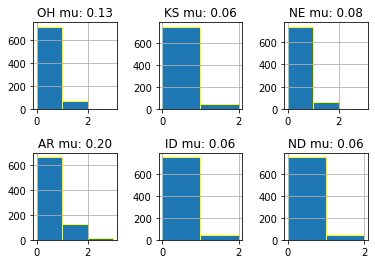

In [50]:
random_states = ['OH', 'KS', 'NE', 'AR', 'ID', 'ND']
fig, axis = plt.subplots(2,3, gridspec_kw={'hspace': .5, 'wspace': .5})
for x, states in zip((0,1), (random_states[0:3], random_states[3:])):
    for y, state in zip((0,1,2), states):
        mu_cases = state_daily_deaths_normalized(state).mean().mean()
        d_poisson = stats.poisson.rvs(mu = mu_cases, size = 800)
        figure = pd.DataFrame(d_poisson).hist(range=(0,max(d_poisson) + 1)
                                    , bins=max(d_poisson)+1, ax = axis[x,y] , ec='yellow')
        axis[x,y].title.set_text(state +" mu: {:.2f}".format(mu_cases))

#### The poisson distribution for daily deaths shows that the likelihood of having no deaths is very high. Almost all graphs are identical and we see that as the mu increases the bin increases.

# Model poission distributions for North Carolina counties COVID-19 in cases and deaths. For example, Number of new cases and deaths per 100,000 populations. 

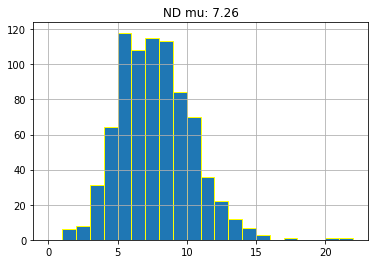

In [56]:
fig, axis = plt.subplots(1,1, gridspec_kw={'hspace': .5, 'wspace': .5})
mu_cases = state_daily_cases_normalized("NC").mean().mean()
d_poisson = stats.poisson.rvs(mu = mu_cases, size = 800)
figure = pd.DataFrame(d_poisson).hist(range=(0,max(d_poisson) + 1)
                            , bins=max(d_poisson)+1, ax = axis , ec='yellow')
axis.title.set_text(state +" mu: {:.2f}".format(mu_cases))

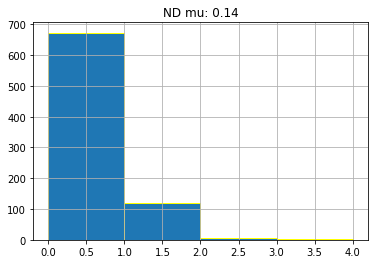

In [57]:
fig, axis = plt.subplots(1,1, gridspec_kw={'hspace': .5, 'wspace': .5})
mu_cases = state_daily_deaths_normalized("NC").mean().mean()
d_poisson = stats.poisson.rvs(mu = mu_cases, size = 800)
figure = pd.DataFrame(d_poisson).hist(range=(0,max(d_poisson) + 1)
                            , bins=max(d_poisson)+1, ax = axis , ec='yellow')
axis.title.set_text(state +" mu: {:.2f}".format(mu_cases))

# Perform corelation between Enrichment data variables and COVID-19 cases to observe any patterns.

### You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based data to enrichment for correlation. Between states you would need to aggregate to state level data and then perform correlation. 

# Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. 

### For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.